In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
df = pd.read_json('PARKROYAL_review')

In [26]:
text = df['Review'].tolist()

## Finding Category - Topic Modelling

## Sentiment Analysis

In [27]:
for i in text:
    print (i)
    print (SentimentIntensityAnalyzer().polarity_scores(i))
    print ('-------------')

Staff, food and the various facilities were beyond my high expectations. I valued the time spent in this place very much and will definitely come again to undergo the special experience one more. Wonderful place.
{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.9061}
-------------
This hotel has a few distinctive features:
1. Eco friendly - Some of the walk ways are open air. Free water is provided in glass bottles that is refilled each day. The pens are made using bamboo. There are vertical plants and other greenery that...More
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.7579}
-------------
Parkroyal was wonderful. The staff could not have been more accommodating to us. We were there on an overnight long layover, with a 10pm flight. We were allowed and encouraged to use all facilities post check out and even let us go to tea time...More
{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.7351}
-------------
It felt like all the staff were given the freedom to make 

## Key Words

In [30]:
cvec = CountVectorizer()
cvec.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [33]:
df_text_vec  = pd.DataFrame(cvec.transform(text).todense(),
             columns=cvec.get_feature_names())

In [49]:
df_text_vec

,10pm,14th,access,accommodating,after,again,air,all,allowed,an,...,way,ways,we,well,were,who,will,with,wonderful,would
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,1,1,...,0,0,2,0,2,0,0,1,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,1,1,1,1,0,1,0,1


In [50]:
for index, row in df_text_vec.T.iterrows():
    row.value_counts()

In [52]:
tfidf = TfidfVectorizer()

In [53]:
tfidf.fit(text)
df_text_tfidfvec  = pd.DataFrame(tfidf.transform(text).todense(),
             columns=cvec.get_feature_names())

In [54]:
df_text_tfidfvec.plot()

,10pm,14th,access,accommodating,after,again,air,all,allowed,an,...,way,ways,we,well,were,who,will,with,wonderful,would
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.186229,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.104918,0.000000,0.186229,0.000000,0.150248,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146381,0.000000,0.000000,0.000000,...,0.000000,0.146381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.161907,0.000000,0.000000,0.161907,0.000000,0.000000,0.000000,0.130625,0.161907,0.161907,...,0.000000,0.000000,0.261251,0.000000,0.182431,0.000000,0.000000,0.108431,0.130625,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.124094,0.000000,0.000000,...,0.153812,0.000000,0.000000,0.000000,0.086655,0.000000,0.000000,0.103009,0.000000,0.000000
4,0.000000,0.151728,0.151728,0.000000,0.151728,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.122413,0.151728,0.085481,0.151728,0.000000,0.101614,0.000000,0.151728


In [55]:
import seaborn as sns

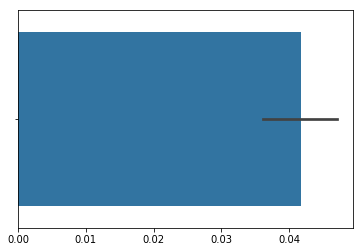

In [56]:
sns.barplot(df_text_tfidfvec)